# Model Training

After the previous couple of ipython notebooks, now I have two datasets two investigate. One is the regular data I got from the website and have been cleaned up for the model training. The second dataset is based on the first one with improving the correlation. I used the logrithm function to scale the data. In this notebook, I will train the model for these two dataset seperatly and compare their results.

In [1]:
# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
# I will look at only four classification algorithms: LogisticRegression, GaussianNB, SVM, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [2]:
## Some useful functions

def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

In [68]:
## Algorithm name

algo=['LR','LASSO','EN','KNN','Tree','SVR']
en=['RF','GB','ET','AB']


## 1. Dataset #1

In [73]:
origin1=pd.read_csv('data1.csv',sep=',',index_col=0)

In [74]:
origin1.head()

,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,healthExp,publicEdu,ave_visitor,income,homicide,ecoFree,uniEnro,alcohol,unemploy,food,suicide,visitor
0,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,58.0,3.1,0.000000,512,6.6,1.0,4.0,0.01,8.5,2100.0,5.7,0
1,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,240.0,3.5,115.182482,4245,5.5,65.1,58.6,5.14,13.9,3023.0,5.9,3156000
2,5.604596,9.487703,0.447821,0.839397,64.001305,-0.198894,0.388313,26.1,335.0,4.3,1.105914,4532,1.3,51.0,32.2,0.66,11.0,3272.0,1.9,2634000
3,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,168.0,3.4,0.423518,3505,9.8,46.7,6.9,8.24,6.9,2384.0,13.8,528000
4,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,727.0,5.1,2.041517,10391,6.6,48.0,79.0,8.35,7.2,3155.0,10.3,5587000


In [75]:
print_columns(origin1)

There are 20 columns
They are:
Happiness
Log GDP per capita
Confidence in national government
Social support
Healthy life expectancy at birth
Generosity
GINI index (World Bank estimate), average 2000-13
child
healthExp
publicEdu
ave_visitor
income
homicide
ecoFree
uniEnro
alcohol
unemploy
food
suicide
visitor


In [76]:
list_null(origin1)

20  columns:
Happiness : number of nan:  0 ,  float64
Log GDP per capita : number of nan:  0 ,  float64
Confidence in national government : number of nan:  0 ,  float64
Social support : number of nan:  0 ,  float64
Healthy life expectancy at birth : number of nan:  0 ,  float64
Generosity : number of nan:  0 ,  float64
GINI index (World Bank estimate), average 2000-13 : number of nan:  0 ,  float64
child : number of nan:  0 ,  float64
healthExp : number of nan:  0 ,  float64
publicEdu : number of nan:  0 ,  float64
ave_visitor : number of nan:  0 ,  float64
income : number of nan:  0 ,  int64
homicide : number of nan:  0 ,  float64
ecoFree : number of nan:  0 ,  float64
uniEnro : number of nan:  0 ,  float64
alcohol : number of nan:  0 ,  float64
unemploy : number of nan:  0 ,  float64
food : number of nan:  0 ,  float64
suicide : number of nan:  0 ,  float64
visitor : number of nan:  0 ,  int64


In [77]:
## Convert our dataframe to numpy array, since we are not interested in the column names

array=origin1.values

In [78]:
## X is the independent variables
## Y is the dependent variable that we are going to predict

X=array[:,1:]
Y=array[:,0]

**Split the train and test dataset**

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

In [80]:
## comparison table

compare=dict()

In [81]:
# Test options and evaluation metric

num_folds=10  ## k-fold cross validation parameter
seed=7
scoring='neg_mean_squared_error' ## the metric for linear regression accuracy

In [82]:
# Spot-Check Algorithms

models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [83]:
# evaluate each model in turn

results=[]
names=[]
compare['Unscaled']=list()
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    compare['Unscaled'].append(cv_results.mean())
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

LR:-0.866731 (1.197343)
LASSO:-0.871784 (0.753867)
EN:-1.110711 (1.490617)
KNN:-1.285727 (0.408268)
CART:-0.832286 (0.322761)
SVR:-1.309465 (0.464355)


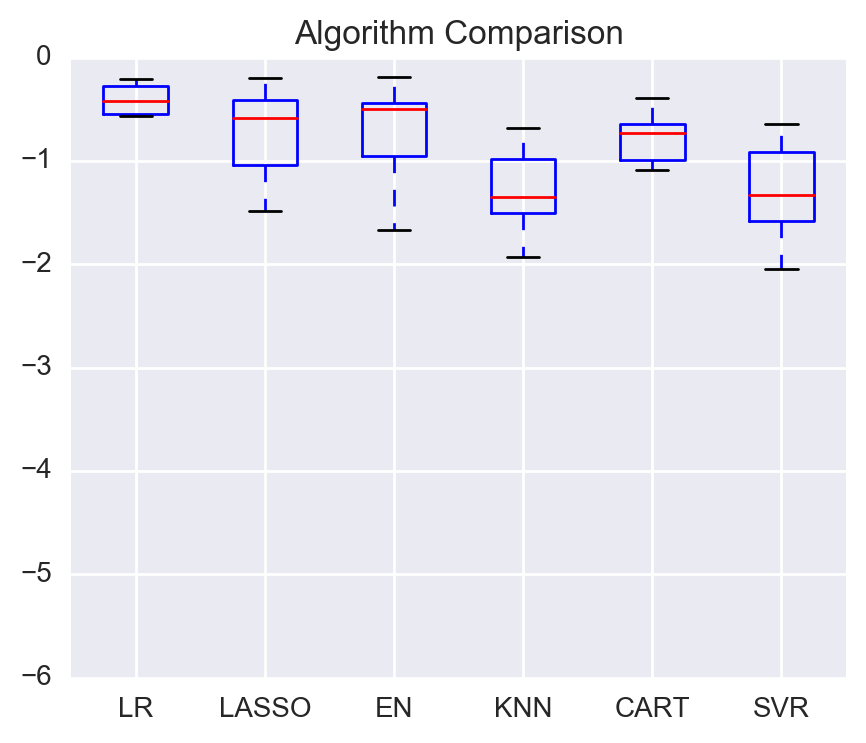

In [84]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names)

Now we finished the model calculation without any parameters. The interesting point is so far we did nothing with the dataset, so now let's consider feature selection and feature scaling effects on our dataset

### 1.1 Evaluate Algorithms: Standardization

In [85]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

In [86]:
results=[]
names=[]
compare['Scaled']=list()
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    compare['Scaled'].append(cv_results.mean())
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledLR:-0.866731 (1.197343)
ScaledLASSO:-1.302421 (0.495503)
ScaledEN:-0.843278 (0.349788)
ScaledKNN:-0.505584 (0.288580)
ScaledCART:-0.727865 (0.238511)
ScaledSVR:-0.464510 (0.198716)


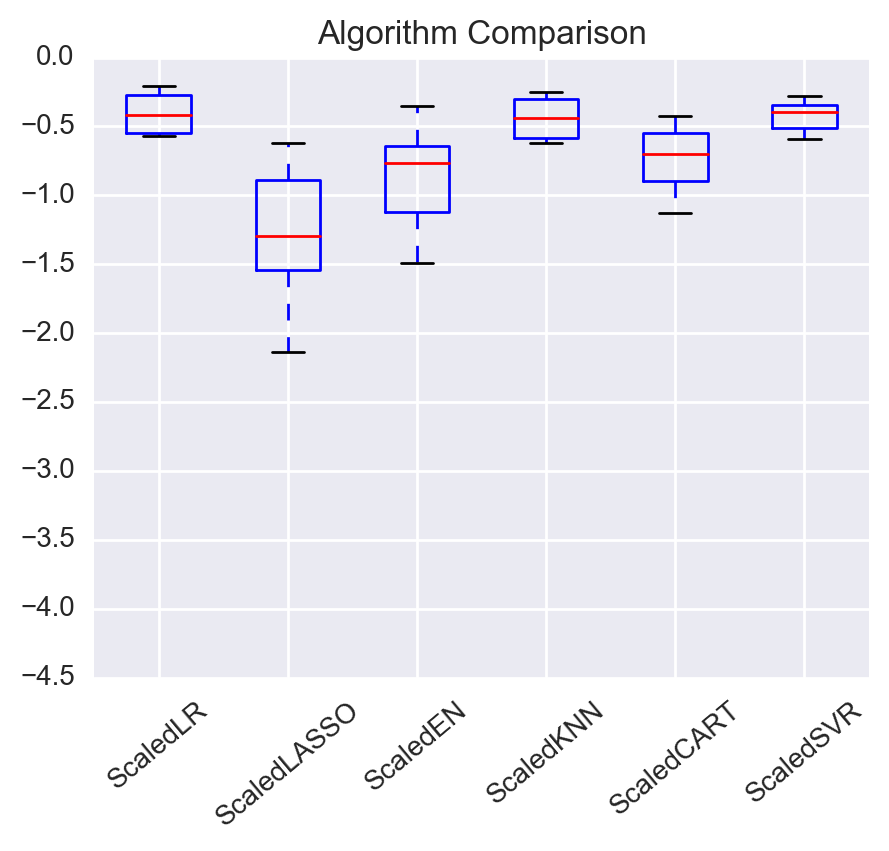

In [87]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names,rotation=40)

### 1.2 Evaluate Algorithms: Feature selection

In [88]:
## create feature union

features=[]
features.append(('pca',PCA(n_components=3)))
features.append(('select_best',SelectKBest(k=6)))
feature_union=FeatureUnion(features)

In [89]:
# Feature selection the dataset

pipelines=[]
pipelines.append(('SelectLR',Pipeline([('feature_union',feature_union),('LR',LinearRegression())])))
pipelines.append(('SelectLASSO',Pipeline([('feature_union',feature_union),('LASSO',Lasso())])))
pipelines.append(('SelectEN',Pipeline([('feature_union',feature_union),('EN',ElasticNet())])))
pipelines.append(('SelectKNN',Pipeline([('feature_union',feature_union),('KNN',KNeighborsRegressor())])))
pipelines.append(('SelectCART',Pipeline([('feature_union',feature_union),('CART',DecisionTreeRegressor())])))
pipelines.append(('SelectSVR',Pipeline([('feature_union',feature_union),('SVR',SVR())])))

In [90]:
results=[]
names=[]
compare['feature_select']=list()
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    compare['feature_select'].append(cv_results.mean())
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

SelectLR:-0.614138 (0.296019)
SelectLASSO:-0.593220 (0.295511)
SelectEN:-0.578053 (0.290580)
SelectKNN:-1.257027 (0.370920)
SelectCART:-0.816076 (0.439127)
SelectSVR:-1.309465 (0.464355)


In [92]:
comparedf=pd.DataFrame(compare,index=algo)
comparedf

,Scaled,Unscaled,feature_select
LR,-0.866731,-0.866731,-0.614138
LASSO,-1.302421,-0.871784,-0.593220
EN,-0.843278,-1.110711,-0.578053
KNN,-0.505584,-1.285727,-1.257027
Tree,-0.727865,-0.832286,-0.816076
SVR,-0.464510,-1.309465,-1.309465


**Conclusion:**

as we can see from the previous result, the scaled KNN and the scaled SVC have the lowest RMS score. So let's tune the parameter of these two models

model 1. Scaled KNN

In [20]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
k_values=np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [21]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.420598 using {'n_neighbors': 11}
-0.946407 (0.243731) with: {'n_neighbors': 1}
-0.458728 (0.186353) with: {'n_neighbors': 3}
-0.467768 (0.290478) with: {'n_neighbors': 5}
-0.436561 (0.249805) with: {'n_neighbors': 7}
-0.424857 (0.193772) with: {'n_neighbors': 9}
-0.420598 (0.183948) with: {'n_neighbors': 11}
-0.439365 (0.224642) with: {'n_neighbors': 13}
-0.453751 (0.242240) with: {'n_neighbors': 15}
-0.477579 (0.227537) with: {'n_neighbors': 17}
-0.503920 (0.237650) with: {'n_neighbors': 19}
-0.529339 (0.242783) with: {'n_neighbors': 21}


model 2. Scaled SVC

In [22]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
c_values=[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
model=SVR()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [23]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.422221 using {'kernel': 'sigmoid', 'C': 0.9}
-0.445611 (0.307801) with: {'kernel': 'linear', 'C': 0.1}
-0.689337 (0.312960) with: {'kernel': 'poly', 'C': 0.1}
-0.770845 (0.302326) with: {'kernel': 'rbf', 'C': 0.1}
-0.503947 (0.231094) with: {'kernel': 'sigmoid', 'C': 0.1}
-0.488497 (0.344638) with: {'kernel': 'linear', 'C': 0.3}
-0.659184 (0.328435) with: {'kernel': 'poly', 'C': 0.3}
-0.481207 (0.244531) with: {'kernel': 'rbf', 'C': 0.3}
-0.436313 (0.288624) with: {'kernel': 'sigmoid', 'C': 0.3}
-0.502530 (0.356147) with: {'kernel': 'linear', 'C': 0.5}
-0.657252 (0.329912) with: {'kernel': 'poly', 'C': 0.5}
-0.443984 (0.215392) with: {'kernel': 'rbf', 'C': 0.5}
-0.424761 (0.315094) with: {'kernel': 'sigmoid', 'C': 0.5}
-0.525571 (0.382763) with: {'kernel': 'linear', 'C': 0.7}
-0.643865 (0.320198) with: {'kernel': 'poly', 'C': 0.7}
-0.440521 (0.201504) with: {'kernel': 'rbf', 'C': 0.7}
-0.434604 (0.319330) with: {'kernel': 'sigmoid', 'C': 0.7}
-0.539750 (0.404344) with: {'kerne

### 1.3 Make prediction for these two models
Now since these two results are quite closed to each other. So let's make prediction for both of them

In [24]:
## Scaled KNN prediction

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=KNeighborsRegressor(n_neighbors=11)
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_test)
predictions=model.predict(rescaledValidationX)
print mean_squared_error(Y_test,predictions)

0.30580897164


In [25]:
## Scaled SVR prediction

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=SVR(kernel='sigmoid', C=0.9)
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_test)
predictions=model.predict(rescaledValidationX)
print mean_squared_error(Y_test,predictions)

0.360509513216


### 1.4 Ensemble methods

Now let's do the same problem by using the ensemble algorithms

In [26]:
## build a models collection

ensembles=[]
ensembles.append(('RF',RandomForestRegressor()))
ensembles.append(('GB',GradientBoostingRegressor()))
ensembles.append(('ET',ExtraTreesRegressor()))
ensembles.append(('AB',AdaBoostRegressor()))


In [27]:
result=[]
names=[]

for name,ensemble in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg='%s : %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print msg

RF : -1.346827 (0.417083)
GB : -1.346827 (0.417083)
ET : -1.346827 (0.417083)
AB : -1.346827 (0.417083)


Now let's look at the scaled method

In [28]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingRegressor())])))
pipelines.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))
pipelines.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))


In [29]:
results=[]
names=[]
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledRF:-0.393154 (0.150595)
ScaledGB:-0.363735 (0.127966)
ScaledET:-0.377808 (0.142887)
ScaledAB:-0.383615 (0.145944)


Now let's tune the parameters of the model scaled GradientBoostingRegressor and AdaBoostRegressor

In [30]:
## Gradient Boosting Regressor

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
learning_rates=[0.01,0.1,1.0]
number_estimators=[50,100,150,200,250,300,350,400]
param_grid=dict(learning_rate=learning_rates,n_estimators=number_estimators)
model=GradientBoostingRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [31]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.371368 using {'n_estimators': 50, 'learning_rate': 0.1}
-0.734290 (0.271290) with: {'n_estimators': 50, 'learning_rate': 0.01}
-0.515482 (0.185948) with: {'n_estimators': 100, 'learning_rate': 0.01}
-0.428436 (0.152652) with: {'n_estimators': 150, 'learning_rate': 0.01}
-0.393750 (0.139514) with: {'n_estimators': 200, 'learning_rate': 0.01}
-0.382268 (0.137415) with: {'n_estimators': 250, 'learning_rate': 0.01}
-0.375180 (0.137978) with: {'n_estimators': 300, 'learning_rate': 0.01}
-0.371992 (0.138483) with: {'n_estimators': 350, 'learning_rate': 0.01}
-0.372627 (0.140368) with: {'n_estimators': 400, 'learning_rate': 0.01}
-0.371368 (0.126681) with: {'n_estimators': 50, 'learning_rate': 0.1}
-0.373560 (0.134638) with: {'n_estimators': 100, 'learning_rate': 0.1}
-0.374163 (0.137364) with: {'n_estimators': 150, 'learning_rate': 0.1}
-0.374150 (0.138022) with: {'n_estimators': 200, 'learning_rate': 0.1}
-0.374479 (0.137960) with: {'n_estimators': 250, 'learning_rate': 0.1}
-0.374

In [32]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
number_estimators=[50,100,150,200,250,300,350,400]
param_grid=dict(n_estimators=number_estimators)
model=AdaBoostRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [33]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.366510 using {'n_estimators': 50}
-0.366510 (0.119623) with: {'n_estimators': 50}
-0.387092 (0.145160) with: {'n_estimators': 100}
-0.377380 (0.129288) with: {'n_estimators': 150}
-0.376021 (0.139623) with: {'n_estimators': 200}
-0.372004 (0.134935) with: {'n_estimators': 250}
-0.372919 (0.131078) with: {'n_estimators': 300}
-0.369237 (0.129514) with: {'n_estimators': 350}
-0.368708 (0.130782) with: {'n_estimators': 400}


In [34]:
## Using Adaboostregressor for final prediction

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=AdaBoostRegressor(n_estimators=50,random_state=seed)
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_test)
predictions=model.predict(rescaledValidationX)
print mean_squared_error(Y_test,predictions)

0.278944279341


## 2. Dataset #2

In [95]:
origin2=pd.read_csv('data2.csv',sep=',',index_col=0)

In [96]:
origin2.head()

,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",publicEdu,homicide,ecoFree,uniEnro,alcohol,unemploy,food,suicide,visitor,log_child,log_healthExp,log_income,log_ave_visitor
0,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,3.1,6.6,1.0,4.0,0.01,8.5,2100.0,5.7,0,4.600158,4.060443,6.238325,-2.302585
1,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,3.5,5.5,65.1,58.6,5.14,13.9,3023.0,5.9,3156000,2.740840,5.480639,8.353497,4.747385
2,5.604596,9.487703,0.447821,0.839397,64.001305,-0.198894,0.388313,4.3,1.3,51.0,32.2,0.66,11.0,3272.0,1.9,2634000,3.261935,5.814131,8.418919,0.187238
3,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,3.4,9.8,46.7,6.9,8.24,6.9,2384.0,13.8,528000,5.148657,5.123964,8.161946,-0.647184
4,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,5.1,6.6,48.0,79.0,8.35,7.2,3155.0,10.3,5587000,2.624669,6.588926,9.248695,0.761515


In [97]:
print_columns(origin2)

There are 20 columns
They are:
Happiness
Log GDP per capita
Confidence in national government
Social support
Healthy life expectancy at birth
Generosity
GINI index (World Bank estimate), average 2000-13
publicEdu
homicide
ecoFree
uniEnro
alcohol
unemploy
food
suicide
visitor
log_child
log_healthExp
log_income
log_ave_visitor


In [98]:
list_null(origin2)

20  columns:
Happiness : number of nan:  0 ,  float64
Log GDP per capita : number of nan:  0 ,  float64
Confidence in national government : number of nan:  0 ,  float64
Social support : number of nan:  0 ,  float64
Healthy life expectancy at birth : number of nan:  0 ,  float64
Generosity : number of nan:  0 ,  float64
GINI index (World Bank estimate), average 2000-13 : number of nan:  0 ,  float64
publicEdu : number of nan:  0 ,  float64
homicide : number of nan:  0 ,  float64
ecoFree : number of nan:  0 ,  float64
uniEnro : number of nan:  0 ,  float64
alcohol : number of nan:  0 ,  float64
unemploy : number of nan:  0 ,  float64
food : number of nan:  0 ,  float64
suicide : number of nan:  0 ,  float64
visitor : number of nan:  0 ,  int64
log_child : number of nan:  0 ,  float64
log_healthExp : number of nan:  0 ,  float64
log_income : number of nan:  0 ,  float64
log_ave_visitor : number of nan:  0 ,  float64


In [99]:
## Convert our dataframe to numpy array, since we are not interested in the column names

array=origin2.values

In [100]:
## X is the independent variables
## Y is the dependent variable that we are going to predict

X=array[:,1:]
Y=array[:,0]

In [101]:
## Algorithm comparison table

compare=dict()

**Split the train and test dataset**

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

In [103]:
# Test options and evaluation metric

num_folds=10  ## k-fold cross validation parameter
seed=7
scoring='neg_mean_squared_error' ## the metric for linear regression accuracy

In [104]:
# Spot-Check Algorithms

models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [105]:
# evaluate each model in turn

results=[]
names=[]
compare['Unscaled']=list()
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    compare['Unscaled'].append(cv_results.mean())
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

LR:-0.426812 (0.267671)
LASSO:-0.718075 (0.402705)
EN:-0.685355 (0.443935)
KNN:-1.242950 (0.432450)
CART:-0.864543 (0.385667)
SVR:-1.309465 (0.464355)


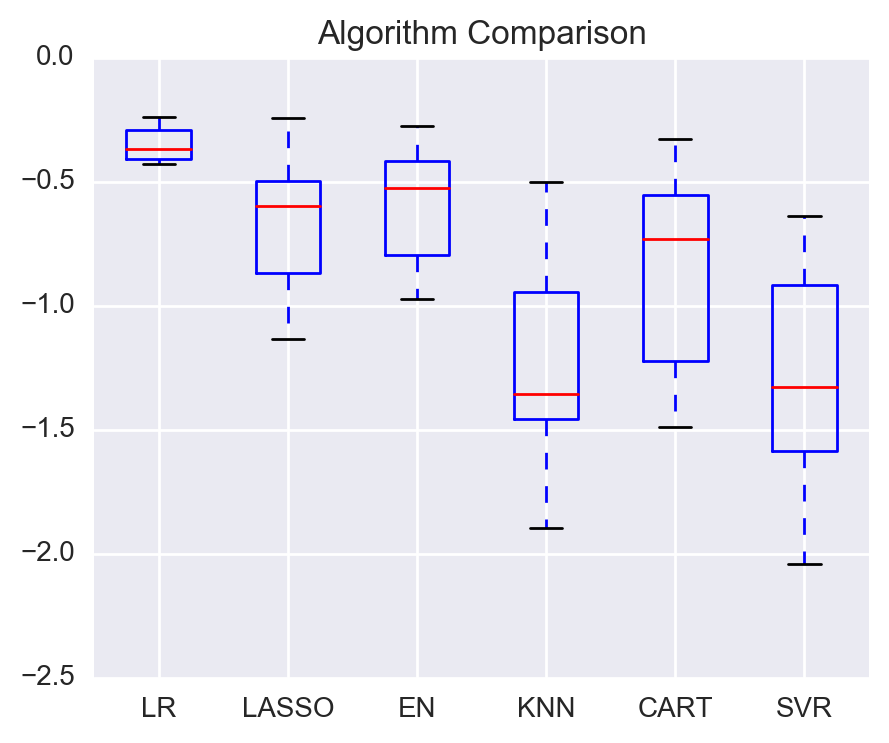

In [106]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names)

Now we finished the model calculation without any parameters. The interesting point is so far we did nothing with the dataset, so now let's consider feature selection and feature scaling effects on our dataset. On average, after rescaling the dataset, the RMS score is lower than unscaled data

### 2.1 Evaluate Algorithms: Standardization

In [107]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

In [108]:
results=[]
names=[]
compare['Scaled']=list()
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    compare['Scaled'].append(cv_results.mean())
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledLR:-0.426812 (0.267671)
ScaledLASSO:-1.302421 (0.495503)
ScaledEN:-0.816776 (0.330822)
ScaledKNN:-0.434117 (0.186640)
ScaledCART:-0.810529 (0.332953)
ScaledSVR:-0.452031 (0.195514)


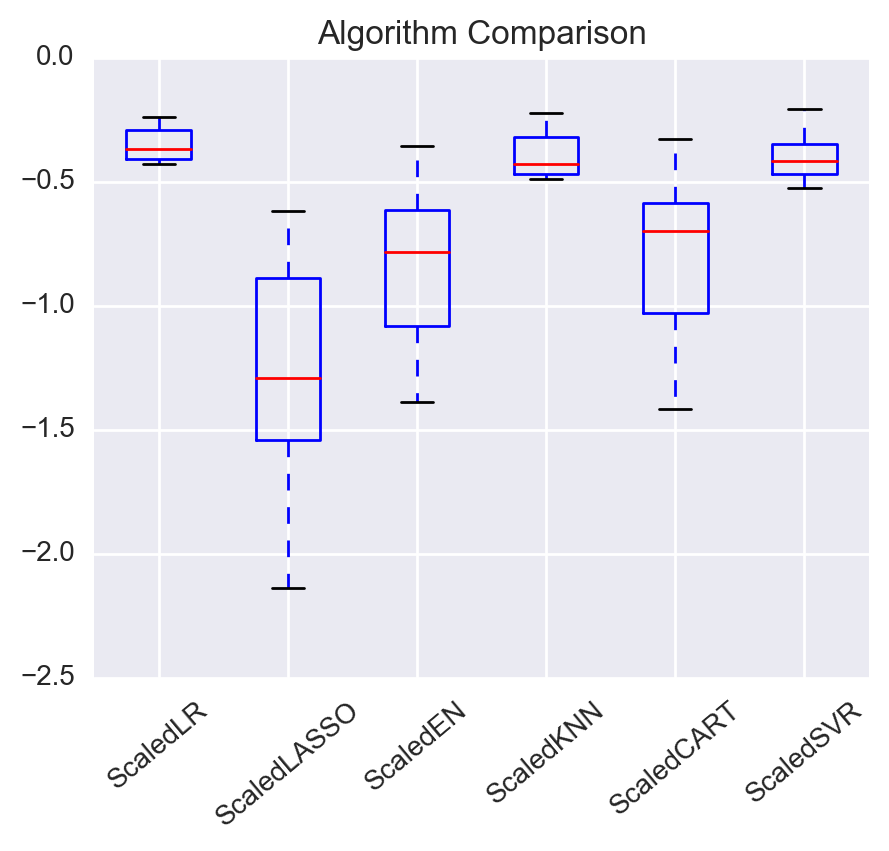

In [109]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names,rotation=40)

### 2.2 Evaluate Algorithms: Feature selection

In [110]:
## create feature union

features=[]
features.append(('pca',PCA(n_components=3)))
features.append(('select_best',SelectKBest(k=6)))
feature_union=FeatureUnion(features)

In [111]:
# Feature selection the dataset

pipelines=[]
pipelines.append(('SelectLR',Pipeline([('feature_union',feature_union),('LR',LinearRegression())])))
pipelines.append(('SelectLASSO',Pipeline([('feature_union',feature_union),('LASSO',Lasso())])))
pipelines.append(('SelectEN',Pipeline([('feature_union',feature_union),('EN',ElasticNet())])))
pipelines.append(('SelectKNN',Pipeline([('feature_union',feature_union),('KNN',KNeighborsRegressor())])))
pipelines.append(('SelectCART',Pipeline([('feature_union',feature_union),('CART',DecisionTreeRegressor())])))
pipelines.append(('SelectSVR',Pipeline([('feature_union',feature_union),('SVR',SVR())])))

In [112]:
results=[]
names=[]
compare['feature_select']=list()
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    compare['feature_select'].append(cv_results.mean())
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

SelectLR:-0.565484 (0.296455)
SelectLASSO:-0.701710 (0.335138)
SelectEN:-0.702924 (0.334439)
SelectKNN:-1.255355 (0.405127)
SelectCART:-0.908254 (0.524030)
SelectSVR:-1.309854 (0.465115)


In [113]:
comparedf2=pd.DataFrame(compare,index=algo)
comparedf2

,Scaled,Unscaled,feature_select
LR,-0.426812,-0.426812,-0.565484
LASSO,-1.302421,-0.718075,-0.701710
EN,-0.816776,-0.685355,-0.702924
KNN,-0.434117,-1.242950,-1.255355
Tree,-0.810529,-0.864543,-0.908254
SVR,-0.452031,-1.309465,-1.309854


**Conclusion:**

as we can see from the previous result, the scaled KNN and the scaled LinearRegression have the lowest RMS score. So let's tune the parameter of these two models

model 1. Scaled KNN

In [53]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
k_values=np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [54]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.379454 using {'n_neighbors': 5}
-0.855381 (0.243034) with: {'n_neighbors': 1}
-0.474505 (0.199212) with: {'n_neighbors': 3}
-0.379454 (0.134772) with: {'n_neighbors': 5}
-0.425472 (0.157984) with: {'n_neighbors': 7}
-0.427944 (0.162020) with: {'n_neighbors': 9}
-0.429071 (0.206493) with: {'n_neighbors': 11}
-0.450448 (0.205829) with: {'n_neighbors': 13}
-0.461780 (0.184691) with: {'n_neighbors': 15}
-0.495346 (0.197537) with: {'n_neighbors': 17}
-0.509730 (0.203903) with: {'n_neighbors': 19}
-0.523743 (0.214181) with: {'n_neighbors': 21}


### 2.3 Make prediction for these two models
Now since these two results are quite closed to each other. So let's make prediction for both of them

In [55]:
## Scaled KNN prediction

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=KNeighborsRegressor(n_neighbors=11)
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_test)
predictions=model.predict(rescaledValidationX)
print mean_squared_error(Y_test,predictions)

0.310804617206


In [56]:
## Scaled KNN prediction

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=LinearRegression()
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_test)
predictions=model.predict(rescaledValidationX)
print mean_squared_error(Y_test,predictions)

0.334335494394


### 2.4 Ensemble methods

Now let's do the same problem by using the ensemble algorithms

In [57]:
## build a models collection

ensembles=[]
ensembles.append(('RF',RandomForestRegressor()))
ensembles.append(('GB',GradientBoostingRegressor()))
ensembles.append(('ET',ExtraTreesRegressor()))
ensembles.append(('AB',AdaBoostRegressor()))


In [58]:
result=[]
names=[]

for name,ensemble in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg='%s : %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print msg

RF : -0.426812 (0.267671)
GB : -0.426812 (0.267671)
ET : -0.426812 (0.267671)
AB : -0.426812 (0.267671)


Now let's look at the scaled method

In [59]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingRegressor())])))
pipelines.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))
pipelines.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))

In [60]:
results=[]
names=[]
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledRF:-0.416113 (0.129261)
ScaledGB:-0.373170 (0.128556)
ScaledET:-0.366742 (0.166409)
ScaledAB:-0.378640 (0.119887)


Now let's tune the parameters of the model scaled GradientBoostingRegressor and ExtraTreesRegressor

In [61]:
## Gradient Boosting Regressor

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
learning_rates=[0.01,0.1,1.0]
number_estimators=[50,100,150,200,250,300,350,400]
param_grid=dict(learning_rate=learning_rates,n_estimators=number_estimators)
model=GradientBoostingRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [62]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.367994 using {'n_estimators': 50, 'learning_rate': 0.1}
-0.733742 (0.271408) with: {'n_estimators': 50, 'learning_rate': 0.01}
-0.513638 (0.184728) with: {'n_estimators': 100, 'learning_rate': 0.01}
-0.425906 (0.151393) with: {'n_estimators': 150, 'learning_rate': 0.01}
-0.390937 (0.138243) with: {'n_estimators': 200, 'learning_rate': 0.01}
-0.378574 (0.135442) with: {'n_estimators': 250, 'learning_rate': 0.01}
-0.371521 (0.135893) with: {'n_estimators': 300, 'learning_rate': 0.01}
-0.368755 (0.136631) with: {'n_estimators': 350, 'learning_rate': 0.01}
-0.368640 (0.137732) with: {'n_estimators': 400, 'learning_rate': 0.01}
-0.367994 (0.125642) with: {'n_estimators': 50, 'learning_rate': 0.1}
-0.370944 (0.133785) with: {'n_estimators': 100, 'learning_rate': 0.1}
-0.371819 (0.136186) with: {'n_estimators': 150, 'learning_rate': 0.1}
-0.371518 (0.136274) with: {'n_estimators': 200, 'learning_rate': 0.1}
-0.371807 (0.136203) with: {'n_estimators': 250, 'learning_rate': 0.1}
-0.372

In [63]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
max_depths=[1,5,10,15,20]
param_grid=dict(max_depth=max_depths)
model=ExtraTreesRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [64]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.358007 using {'max_depth': 5}
-0.685811 (0.285889) with: {'max_depth': 1}
-0.358007 (0.147123) with: {'max_depth': 5}
-0.401025 (0.165861) with: {'max_depth': 10}
-0.439564 (0.190974) with: {'max_depth': 15}
-0.435958 (0.184175) with: {'max_depth': 20}


In [65]:
## Using Adaboostregressor for final prediction

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=ExtraTreesRegressor(max_depth=5,random_state=seed)
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_test)
predictions=model.predict(rescaledValidationX)
print mean_squared_error(Y_test,predictions)

0.322425442168
